In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
data = pd.read_csv('SNP500.csv')

In [9]:
data.head()

,date,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,year,month,day
0,2015-01-02,2058.90,2072.36,2046.26,2058.20,13892,2015,1,2
1,2015-01-05,2054.44,2054.44,2017.34,2020.58,17383,2015,1,5
2,2015-01-06,2022.15,2030.25,1992.44,2002.61,18442,2015,1,6
3,2015-01-07,2005.55,2029.61,2005.55,2025.90,16975,2015,1,7
4,2015-01-08,2030.61,2064.08,2030.61,2062.14,15584,2015,1,8


In [10]:
data['date'] = pd.to_datetime(data['date'])
data.index = data['date']
data=data.drop(['date'],axis=1)
data.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,year,month,day
date,,,,,,,,
2015-01-02,2058.90,2072.36,2046.26,2058.20,13892,2015,1,2
2015-01-05,2054.44,2054.44,2017.34,2020.58,17383,2015,1,5
2015-01-06,2022.15,2030.25,1992.44,2002.61,18442,2015,1,6
2015-01-07,2005.55,2029.61,2005.55,2025.90,16975,2015,1,7
2015-01-08,2030.61,2064.08,2030.61,2062.14,15584,2015,1,8


In [11]:
data.index.dayofweek.unique()
data.to_csv('SNP500.csv')

Int64Index([4, 0, 1, 2, 3], dtype='int64', name=u'date')

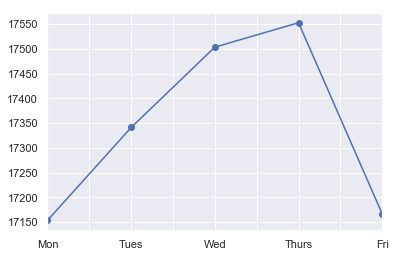

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
VOL_day_of_week=data.groupby(data.index.dayofweek)['<VOL>'].mean()
VOL_day_of_week.index = ['Mon','Tues','Wed','Thurs', 'Fri']
VOL_day_of_week.plot(style='o-')

Text(0,0.5,'Volume mean hourly count')

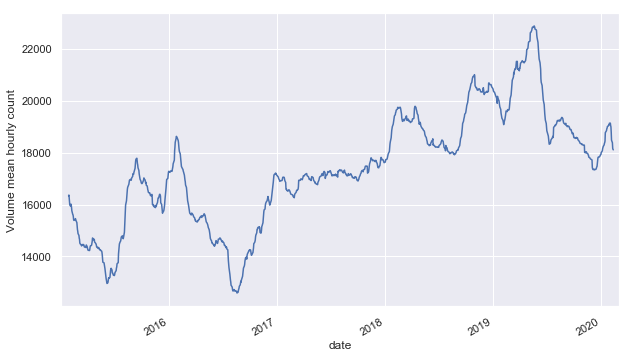

In [17]:
data['<VOL>'].rolling(30, center=True).mean().plot(figsize=(10,6), style='-') #вычисление скользящего среднего за 90 дней
plt.ylabel('Volume mean hourly count') # Средний объем за 90 дней

Text(0,0.5,'CLOSE SNP500 mean hourly count')

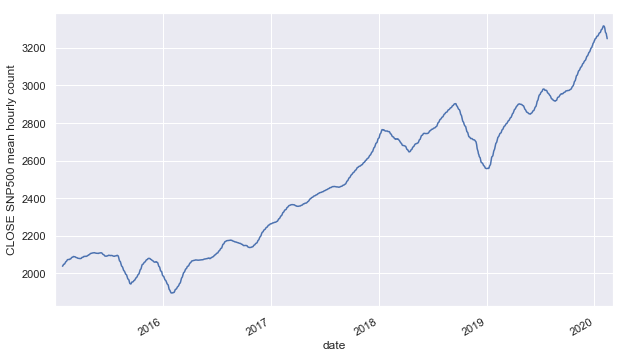

In [18]:
data['<CLOSE>'].rolling(30, center=True).mean().plot(figsize=(10,6), style='-')
plt.ylabel('CLOSE SNP500 mean hourly count') # Средняя цена закрытия за 90 дней

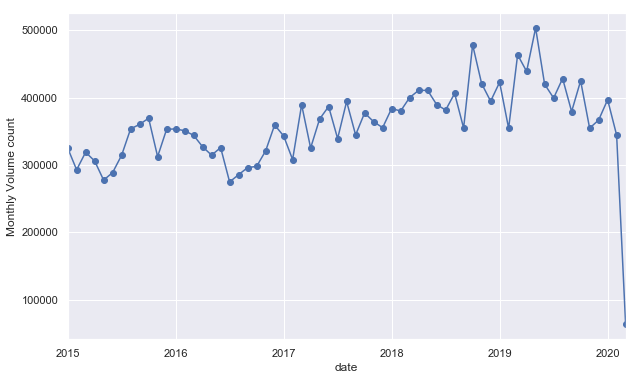

In [19]:
monthly = data['<VOL>'].resample('M').sum() #объем за месяц
monthly.plot(figsize=(10,6), style='o-')
plt.ylabel('Monthly Volume count'); # еженедельно

In [49]:
year_month_vol = pd.DataFrame(data.groupby(['year','month'])['<VOL>'].mean().unstack(level=0))
year_month_vol

year,2015,2016,2017,2018,2019,2020
month,,,,,,
1,16265.450000,18602.789474,17152.900000,18271.047619,20127.095238,18893.285714
2,15412.210526,17537.350000,16207.684211,20000.842105,18649.315789,18122.947368
3,14492.818182,15634.681818,16929.826087,19042.380952,22067.952381,15833.750000
4,14568.523810,15567.190476,17113.263158,19555.000000,20893.904762,NaN
5,13874.900000,14975.761905,16735.318182,18664.227273,22873.045455,NaN
6,13123.636364,14806.318182,17575.954545,18552.809524,20985.800000,NaN
7,14288.318182,13739.150000,16956.050000,18163.714286,18149.409091,NaN
8,16834.857143,12418.043478,17137.304348,17653.913043,19464.590909,NaN
9,17151.714286,14097.285714,17226.300000,18669.000000,18959.500000,NaN


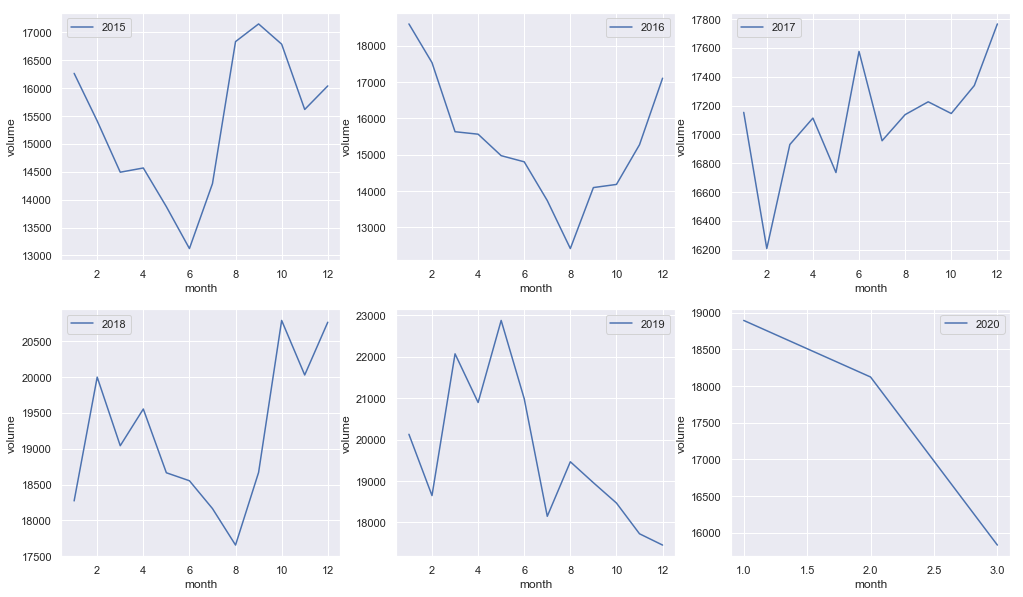

In [87]:
fig, ax = plt.subplots(2, 3, figsize=(17, 10))
for i, axi in enumerate(ax.flat):
    x= year_month_vol.index
    y= year_month_vol[year_month_vol.columns[i]]
    axi.plot(x, y, label=str(year_month_vol.columns[i]))
    axi.set_xlabel('month')
    axi.set_ylabel('volume')
    axi.legend()
